# Final Project
BioE 131/231 Fall 2019

## Overview
Congratulations, all! You have made	it to the final	project. From now	until the end of the semester, you will analyze a set of genomes using the skills you have learned thus far and explore new types of analysis. These genomes come from the Salmonella reference collection (https://people.ucalgary.ca/~kesander/Kit_14A.html), which were isolated from different sources many years ago, but have not been fully analyzed. We are interested in learning more about these strains and their pathogenicity.

The goal of this part of class is to let you work on a real, unpublished dataset, applying your  own ideas of how best to conduct the analysis. Ideas for projects, deliverables, and due dates  are listed below on a week-by-week basis.

## Timeline
**Week 1:** Break into groups, obtain data, assemble genome, annotate genome.  
**Week 2:** Propose your own analysis.	
**Week 3:** No lab (Thanksgiving). Work on your own analysis.	
**Week 4:** Group presentations during lab. Final report due.  

## Background
Genome sequencing and assembly are common techniques in biology. To obtain the sequence of a long genome, DNA must be chopped into small pieces that can be read by a sequencer. These short reads must then be stitched back together to form a complete genome. Often, the genome cannot be fully assembled because there are multiple equally plausible ways of stitching the reads together. Ideally, each chromosome is assembled into a single, long sequence. In practice, chromosomes are often assembled into multiple “contigs,” or contiguous sequences. A genome assembly is generally considered complete only when all (or nearly all) the sequences are accounted for. Otherwise, it is considered a draft genome.  

In a previous lab, you filtered human reads from a bacterial genome by alignment using Bowtie2. In this lab, you will continue your analysis, albeit with a different set of reads. First, you must take the reads and combine them into a complete genome. Next week, you will analyze the contents of your genome.

## Week 1
First off, find a group of four people (max five per group). Please let your GSI know who is in your new group so they can keep track. Your GSI will assign you a set of reads for the final project. Each group will be given a different set of reads.  

Next, please assemble your genome into contigs using SPAdes as we did in lab 8/9 using the -1 and -2 flags for paired end reads. Remember to run your assembly using -t 1 and -m 16 to limit your CPU and memory usage (save some for everyone else). If those limits are too low, let your GSI know. This will take a while, so be sure to run it in tmux.  

When you’re done, calculate assembly statistics and plot a histogram of contig lengths from your genome assembly in iPython, along with the N50. Summarize your results from SeqMatch (do we have the strain we expect?) and RAST/BASys annotations. (If annotation isn't ready in time, submit this in Week 2). Your report is due the following Wednesday at 11:59 AM.

### Running SPAdes
Ran
```
ls /bigdata/FinalProject_data
ls /bigdata/FinalProject_data/190724_SARA_Genomes
```
to validate the file location and file names.  

Prepare spades command and run from `/bigdata/FinalProject_groups/Group_5/assembly`: 
```
spades.py -o . -1 /bigdata/FinalProject_data/190724_SARA_Genomes/SARA_5_S28_L004_R1_001.fastq.gz -2 /bigdata/FinalProject_data/190724_SARA_Genomes/SARA_5_S28_L004_R2_001.fastq.gz -t 1
```
-o is destination directory (. for present directory)  
-1 is location of reads 1  
-2 is location of reads 2  
-t 1 reserves only 1 core for the process  

### Run assembly-stats
Prepare Command, run from `bigdata/FinalProject_groups/Group_5/assembly`: 
```
assembly-stats ./contigs.fasta ./scaffolds.fasta
```
Output: 
```
stats for ./contigs.fasta
sum = 4960322, n = 153, ave = 32420.41, largest = 449208
N50 = 194186, n = 9
N60 = 130292, n = 13
N70 = 109439, n = 17
N80 = 87947, n = 22
N90 = 51460, n = 29
N100 = 56, n = 153
N_count = 0
Gaps = 0
----------------------------------------------------------------
stats for ./scaffolds.fasta
sum = 4960972, n = 146, ave = 33979.26, largest = 449208
N50 = 223794, n = 8
N60 = 159283, n = 10
N70 = 143384, n = 13
N80 = 89581, n = 18
N90 = 56692, n = 24
N100 = 56, n = 146
N_count = 700
Gaps = 7
```

### Plot Contig Coverage Histogram

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO

#### Extract Coverage Data

In [2]:
coverage_datas = []
directory = "/bigdata/FinalProject_groups/Group_5/assembly/"
file_names = ["contigs", "scaffolds"]
for file_name in file_names:
    coverage_data = []
    with open(directory + file_name + ".fasta", "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            header = record.id
            index = int(header.find("_cov_") + len("_cov_"))
            coverage = float(header[index:])
            coverage_data.append(coverage)
    coverage_datas.append(coverage_data)

#### Plot Coverage Data Histogram

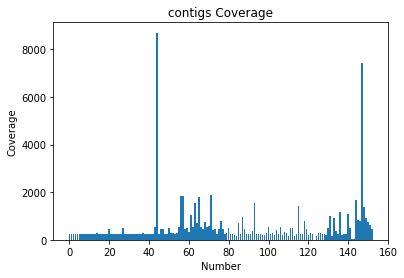

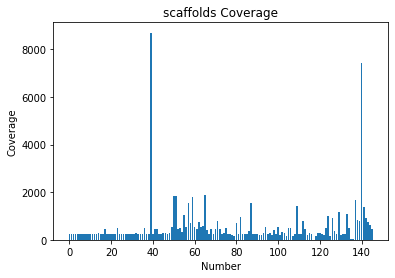

In [3]:
for i in range(len(coverage_datas)):
    coverage_data = coverage_datas[i]
    plt.title(file_names[i] + " Coverage")
    plt.bar(range(len(coverage_data)), coverage_data)
    plt.xlabel("Number")
    plt.ylabel("Coverage")
    plt.show()
#     plt.savefig(file_names[i] + "_coverage")

### Plot Contig Length Histogram

In [4]:
length_datas = []
directory = "/bigdata/FinalProject_groups/Group_5/assembly/"
file_names = ["contigs", "scaffolds"]
for file_name in file_names:
    length_data = []
    with open(directory + file_name + ".fasta", "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            header = record.id
            start_index = int(header.find("_length_") + len("_length_"))
            end_index = int(header.find("_cov_") + len("_cov_"))
            coverage = float(header[start_index:end_index-5])
            length_data.append(coverage)
    length_datas.append(length_data)

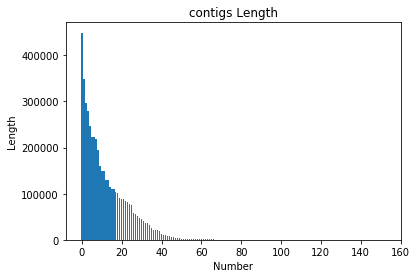

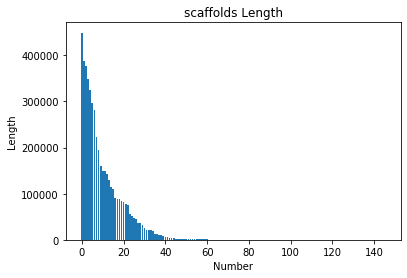

In [5]:
for i in range(len(length_datas)):
    length_data = length_datas[i]
    plt.title(file_names[i] + " Length")
    plt.bar(range(len(length_data)), length_data)
    plt.xlabel("Number")
    plt.ylabel("Length")
    plt.show()
#     plt.savefig(file_names[i] + "_length.png")

## Identify the taxon from which your genome originated

We moved the HMM database to `/bigdata/FinalProject_groups/Group_5/rna_hmm3/HMM3`: 
```
ls /bigdata/FinalProject_groups/Group_5/rna_hmm3/HMM3
```
```
arc_lsu.hmm  arc_ssu.hmm  arc_tsu.hmm  bac_lsu.hmm  bac_ssu.hmm  bac_tsu.hmm
```
run `rna_hmm.py` from `/bigdata/FinalProject_groups/Group_5`
```
rna_hmm3.py -i /bigdata/FinalProject_groups/Group_5/assembly/contigs.fasta -o ./rna_hmm3_o -L /bigdata/FinalProject_groups/Group_5/rna_hmm3/HMM3
```
output file: `rna_hmm3_o`

Made a copy and deleted all lines other than 16S_rRNA in text editor. Filename: `rna_hmm3_16`

Extract nucleic acid sequences from `/bigdata/FinalProject_groups/Group_5`
Note: didn't have write-permission to assembly, so ran
```
cp assembly/contigs.fasta .
```
```
bedtools getfasta -fi ./contigs.fasta -bed ./rna_hmm3_16 -fo ./nucleic_acids
```

Output sequence in next cell.  

Ran SeqMatch on `contigs.fasta`

domain Bacteria (20)  
&nbsp;&nbsp;&nbsp;phylum "Proteobacteria" (20)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;class Gammaproteobacteria (20)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;order Enterobacteriales (20)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;family Enterobacteriaceae (20)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;genus Salmonella (20)  

```
>NODE_57_length_1736_cov_1821.819155:45-1598
AAGGTAAGGAGGTGATCCAACCGCAGGTTCCCCTACGGTTACCTTGTTACGACTTCACCCCAGTCATGAATCACAAAGTGGTAAGCGCCCTCCCGAAGGTTAAGCTACCTACTTCTTTTGCAACCCACTCCCATGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGTGGCATTCTGATCCACGATTACTAGCGATTCCGACTTCATGGAGTCGAGTTGCAGACTCCAATCCGGACTACGACGCACTTTATGAGGTCCGCTTGCTCTCGCGAGGTCGCTTCTCTTTGTATGCGCCATTGTAGCACGTGTGTAGCCCTGGTCGTAAGGGCCATGATGACTTGACGTCATCCCCACCTTCCTCCAGTTTATCACTGGCAGTCTCCTTTGAGTTCCCGACCTAATCGCTGGCAACAAAGGATAAGGGTTGCGCTCGTTGCGGGACTTAACCCAACATTTCACAACACGAGCTGACGACAGCCATGCAGCACCTGTCTCACAGTTCCCGAAGGCACCAATCCATCTCTGGAAAGTTCTGTGGATGTCAAGACCAGGTAAGGTTCTTCGCGTTGCATCGAATTAAACCACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCATTTGAGTTTTAACCTTGCGGCCGTACTCCCCAGGCGGTCTACTTAACGCGTTAGCTCCGGAAGCCACGCCTCAAGGGCACAACCTCCAAGTAGACATCGTTTACGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGCACCTGAGCGTCAGTCTTTGTCCAGGGGGCCGCCTTCGCCACCGGTATTCCTCCAGATCTCTACGCATTTCACCGCTACACCTGGAATTCTACCCCCCTCTACAAGACTCAAGCCTGCCAGTTTCGAATGCAGTTCCCAGGTTGAGCCCGGGGATTTCACATCCGACTTGACAGACCGCCTGCGTGCGCTTTACGCCCAGTAATTCCGATTAACGCTTGCACCCTCCGTATTACCGCGGCTGCTGGCACGGAGTTAGCCGGTGCTTCTTCTGCGGGTAACGTCAATTGCTGCGGTTATTAACCACAACACCTTCCTCCCCGCTGAAAGTACTTTACAACCCGAAGGCCTTCTTCATACACGCGGCATGGCTGCATCAGGCTTGCGCCCATTGTGCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGACCGTGTCTCAGTTCCAGTGTGGCTGGTCATCCTCTCAGACCAGCTAGGGATCGTCGCCTTGGTGAGCCGTTACCTCACCAACAAGCTAATCCCATCTGGGCACATCTGATGGCAAGAGGCCCGAAGGTCCCCCTCTTTGGTCTTGCGACGTTATGCGGTATTAGCCACCGTTTCCAGTAGTTATCCCCCTCCATCAGGCAGTTTCCCAGACATTACTCACCCGTCCGCCACTCGTCAGCGAAGCAGCAAGCTGCTTCCTGTTACCGTTCGACTTGCATGTGTTAGGCCTGCCGCCAGCGTTCAATCTGAGCCATGATCAAACTCTTCAATTTAAAAGTT
```

![SeqMatch_results](SeqMatch_results.png)

## Genome annotation
### RAST
```
Login: Qube5  
Password: w5mAvPg4  
```  

Ran RAST annotation with contigs.fasta

Job Status: http://rast.theseed.org/FIG/rast.cgi?page=JobDetails&job=797079

--------------------------

## Week 2
By now, you should have an assembly and annotation of your genome. While you are waiting for your annotations, you can start brainstorming ideas for your own analysis. Before you leave  today, make sure your GSI approves of your project. You will have two weeks (including 
Thanksgiving) to work on it before your final presentation.  

**A list of project ideas will be uploaded to bCourses shortly if it hasn’t been already.**  

Upload a report summarizing the findings of your annotations and a description of the project you intend to work on by the following Wednesday at 11:59 AM.

--------------------------

#### Imports

In [6]:
import pandas as pd
from collections import Counter

#### Extract Data

In [7]:
# Extract genbank data and put into dictionary for recovery later
directory = "/bigdata/FinalProject_groups/Group_5/Groups/"
groups = [
    1, 3, 4, 5, 6, 7, 
    8, 9, 10, 11, 12, 
    14, 15
]
genbank = {}
for group in groups:
    file_name = directory + "Group" + str(group) + "/Group" + str(group) + ".gbk"
    for seq_record in SeqIO.parse(file_name, "genbank"):
        organism = seq_record.annotations["organism"]
        if len(seq_record.features) > 1:
            for feature in seq_record.features[1:]:
                name = feature.qualifiers["db_xref"][0][5:]
                if feature.type != 'CDS':
                    continue
                protein_sequence = feature.qualifiers["translation"][0]
                protein_name = feature.qualifiers["product"][0]
                genbank[name] = [protein_sequence, protein_name, organism]


In [8]:
# Parse mp3 output data
columns = ["Group", "Sr._No.", "Sequence_Name", "Type_of_Pfam_domains", 
           "HMM_Prediction", "SVM_Score", 
           "SVM_prediction", "Hybrid_Prediction", "Assignment", 
           "Sequence", "Product", "Organism"]
data = []
for group in groups:
    file_name = directory + "Group" + str(group) + "/Group" + str(group) + ".faa.Hybrid.result"
    with open(file_name, "r") as handle:
        lines = handle.readlines()[1:]
        for line in lines:
            if len(line) == 1:
                continue
            l = line.split('\t')
            if len(l) == 8:
                for i in range(len(l)):
                    l[i] = l[i].strip()
                l[4] = float(l[4])
                l[0] = int(float(l[0]))
                # add in genbank data
                l.extend(genbank[l[1]])
                # add group number field
                l.insert(0, group)
                data.append(l)


#### Create Dataframe
We chose to use pandas dataframe for our database because it is easy to implement. In the future we could implement a SQL relational database which would help link our entries. 

In [9]:
df = pd.DataFrame(data=data, columns=columns)

Save to pickle for faster loading without input files

In [10]:
df.to_pickle("./salmonella_database.pkl")

Load from Pickle

In [11]:
df = pd.read_pickle("./salmonella_database.pkl")

In [12]:
display(df)

,Group,Sr._No.,Sequence_Name,Type_of_Pfam_domains,HMM_Prediction,SVM_Score,SVM_prediction,Hybrid_Prediction,Assignment,Sequence,Product,Organism
0,1,1,fig|6666666.498498.peg.1337,Uncalssified protein,----------,-0.090801,Pathogenic,Pathogenic,S,RQAWRTIALFCVTECFPEDVITDKVEPLTPVYLMTTLMPDVPLTDA...,hypothetical protein,salmonella sp. Bacteria.
1,1,2,fig|6666666.498498.peg.1338,Excl. Non-pathogenic,Non-Pathogenic,0.495358,Pathogenic,Non-Pathogenic,H,MQAIASELSARLNTPVEVGGVEANMAVAGALTTPGCDAPLAILDLG...,Glycerol dehydratase reactivation factor large...,salmonella sp. Bacteria.
2,1,3,fig|6666666.498498.peg.1339,Excl. Non-pathogenic,Non-Pathogenic,0.029591,Pathogenic,Non-Pathogenic,H,MEFFREPLSPSVFAKVVYLKEGELIPVDNQTSLEKIRLVRRQAKEK...,Glycerol dehydratase reactivation factor large...,salmonella sp. Bacteria.
3,1,4,fig|6666666.498498.peg.1340,Uncalssified protein,----------,-0.623353,Non-Pathogenic,Non-Pathogenic,S,MPTAIEKALDFIGGMNTSASVPHSMDESTAKGILKYLHDLGVPVSP...,Uncharacterized protein YoaC,salmonella sp. Bacteria.
4,1,5,fig|6666666.498498.peg.1341,Uncalssified protein,----------,1.387766,Pathogenic,Pathogenic,S,MKNNIEETIGKYLPILMILPLAGLAELASLYSIQALLPKLSEVYNI...,Uncharacterized MFS-type transporter STM0328.s,salmonella sp. Bacteria.
5,1,6,fig|6666666.498498.peg.1342,Excl. Non-pathogenic,Non-Pathogenic,-1.139471,Non-Pathogenic,Non-Pathogenic,HS,MSAKTLYEKLVESHTIRELDNEGHVLLYIDRSILNEYTSPQAFSGL...,3-isopropylmalate dehydratase large subunit (E...,salmonella sp. Bacteria.
6,1,7,fig|6666666.498498.peg.1343,Excl. Non-pathogenic,Non-Pathogenic,-1.155033,Non-Pathogenic,Non-Pathogenic,HS,MDTFKQISGRIAPMLEPNIDTDVIMPKQFLKGIDRQGLDKGVFFDR...,3-isopropylmalate dehydratase small subunit (E...,salmonella sp. Bacteria.
7,1,8,fig|6666666.498498.peg.1344,Excl. Non-pathogenic,Non-Pathogenic,-0.012713,Pathogenic,Non-Pathogenic,H,MKLVQYLVNGGKRYGIMQETGIIDLSQRLGDKYPTLKSLLCANALT...,Fumarylacetoacetate hydrolase family protein,salmonella sp. Bacteria.
8,1,9,fig|6666666.498498.peg.1345,Excl. Non-pathogenic,Non-Pathogenic,-0.573160,Non-Pathogenic,Non-Pathogenic,HS,MSTLIECGASPFIPGFALKDVRLENGLTVRVAIGGSGSPLVLLHGH...,Putative hydrolase or acyltransferase,salmonella sp. Bacteria.
9,1,10,fig|6666666.498498.peg.1346,Uncalssified protein,----------,-0.229870,Non-Pathogenic,Non-Pathogenic,S,MKTTPVGKKHRQPLEGWPSVEDLFVFVTVARNGGFARAALELGLSP...,"Transcriptional regulator, LysR family",salmonella sp. Bacteria.


#### Query Examples

In [13]:
qHS = df.query('Assignment == "HS"') 
display(qHS)

,Group,Sr._No.,Sequence_Name,Type_of_Pfam_domains,HMM_Prediction,SVM_Score,SVM_prediction,Hybrid_Prediction,Assignment,Sequence,Product,Organism
5,1,6,fig|6666666.498498.peg.1342,Excl. Non-pathogenic,Non-Pathogenic,-1.139471,Non-Pathogenic,Non-Pathogenic,HS,MSAKTLYEKLVESHTIRELDNEGHVLLYIDRSILNEYTSPQAFSGL...,3-isopropylmalate dehydratase large subunit (E...,salmonella sp. Bacteria.
6,1,7,fig|6666666.498498.peg.1343,Excl. Non-pathogenic,Non-Pathogenic,-1.155033,Non-Pathogenic,Non-Pathogenic,HS,MDTFKQISGRIAPMLEPNIDTDVIMPKQFLKGIDRQGLDKGVFFDR...,3-isopropylmalate dehydratase small subunit (E...,salmonella sp. Bacteria.
8,1,9,fig|6666666.498498.peg.1345,Excl. Non-pathogenic,Non-Pathogenic,-0.573160,Non-Pathogenic,Non-Pathogenic,HS,MSTLIECGASPFIPGFALKDVRLENGLTVRVAIGGSGSPLVLLHGH...,Putative hydrolase or acyltransferase,salmonella sp. Bacteria.
11,1,12,fig|6666666.498498.peg.1348,Exclusive Pathogenic,Pathogenic,1.628424,Pathogenic,Pathogenic,HS,MRNYRQWLVFSKVILTLLGLTGWYGPAQAAVNIDRTRIIFASDEVA...,Fimbrial chaperone protein,salmonella sp. Bacteria.
12,1,13,fig|6666666.498498.peg.1349,Exclusive Pathogenic,Pathogenic,2.077410,Pathogenic,Pathogenic,HS,MLFSFRTLLFITSLFVSAGTWSSCIKVTDKSALSDAAIKAGYTAQN...,Putative exported protein precursor,salmonella sp. Bacteria.
13,1,14,fig|6666666.498498.peg.1350,Exclusive Pathogenic,Pathogenic,1.611401,Pathogenic,Pathogenic,HS,MSPTINLNRKSLALLIAIVCSGSAQSEEYYFDPALLQGATYGQNIA...,FIG031703: Fimbriae usher protein StbC,salmonella sp. Bacteria.
14,1,15,fig|6666666.498498.peg.1351,Exclusive Pathogenic,Pathogenic,1.228870,Pathogenic,Pathogenic,HS,MKMDTRHSALYYLIVFLFLALPATASWASVTILGSRIIYPSTASSV...,Fimbrial chaperone protein,salmonella sp. Bacteria.
15,1,16,fig|6666666.498498.peg.1352,Exclusive Pathogenic,Pathogenic,3.980934,Pathogenic,Pathogenic,HS,MSMKKYLAMITGSLLVSSSAMAVSDNTITFQGEVSDETCSVVINGN...,Fimbrial protein precursor,salmonella sp. Bacteria.
22,1,23,fig|6666666.498498.peg.1359,Exclusive Pathogenic,Pathogenic,1.702590,Pathogenic,Pathogenic,HS,MKRRSSFLVFLGLLLASPLALANDQHTVSFGYAQTHLSSLKNSDSK...,Attachment invasion locus protein precursor,salmonella sp. Bacteria.
26,1,27,fig|6666666.498498.peg.1363,Exclusive Pathogenic,Pathogenic,0.923416,Pathogenic,Pathogenic,HS,MKITFTGYRQTATLATLAFVTTLAGCTMAPKHERPASPTAMVYPYA...,"Multidrug efflux system, outer membrane factor...",salmonella sp. Bacteria.


In [14]:
qMult = df.query('HMM_Prediction == "Pathogenic" and SVM_prediction == "Pathogenic"') 
display(qMult)

,Group,Sr._No.,Sequence_Name,Type_of_Pfam_domains,HMM_Prediction,SVM_Score,SVM_prediction,Hybrid_Prediction,Assignment,Sequence,Product,Organism
11,1,12,fig|6666666.498498.peg.1348,Exclusive Pathogenic,Pathogenic,1.628424,Pathogenic,Pathogenic,HS,MRNYRQWLVFSKVILTLLGLTGWYGPAQAAVNIDRTRIIFASDEVA...,Fimbrial chaperone protein,salmonella sp. Bacteria.
12,1,13,fig|6666666.498498.peg.1349,Exclusive Pathogenic,Pathogenic,2.077410,Pathogenic,Pathogenic,HS,MLFSFRTLLFITSLFVSAGTWSSCIKVTDKSALSDAAIKAGYTAQN...,Putative exported protein precursor,salmonella sp. Bacteria.
13,1,14,fig|6666666.498498.peg.1350,Exclusive Pathogenic,Pathogenic,1.611401,Pathogenic,Pathogenic,HS,MSPTINLNRKSLALLIAIVCSGSAQSEEYYFDPALLQGATYGQNIA...,FIG031703: Fimbriae usher protein StbC,salmonella sp. Bacteria.
14,1,15,fig|6666666.498498.peg.1351,Exclusive Pathogenic,Pathogenic,1.228870,Pathogenic,Pathogenic,HS,MKMDTRHSALYYLIVFLFLALPATASWASVTILGSRIIYPSTASSV...,Fimbrial chaperone protein,salmonella sp. Bacteria.
15,1,16,fig|6666666.498498.peg.1352,Exclusive Pathogenic,Pathogenic,3.980934,Pathogenic,Pathogenic,HS,MSMKKYLAMITGSLLVSSSAMAVSDNTITFQGEVSDETCSVVINGN...,Fimbrial protein precursor,salmonella sp. Bacteria.
22,1,23,fig|6666666.498498.peg.1359,Exclusive Pathogenic,Pathogenic,1.702590,Pathogenic,Pathogenic,HS,MKRRSSFLVFLGLLLASPLALANDQHTVSFGYAQTHLSSLKNSDSK...,Attachment invasion locus protein precursor,salmonella sp. Bacteria.
26,1,27,fig|6666666.498498.peg.1363,Exclusive Pathogenic,Pathogenic,0.923416,Pathogenic,Pathogenic,HS,MKITFTGYRQTATLATLAFVTTLAGCTMAPKHERPASPTAMVYPYA...,"Multidrug efflux system, outer membrane factor...",salmonella sp. Bacteria.
53,1,54,fig|6666666.498498.peg.1390,Exclusive Pathogenic,Pathogenic,2.928851,Pathogenic,Pathogenic,HS,MHSWKKKLVVSQLALACTLAITSQANATTYDTWTYYDNPTTALDWN...,Uncharacterized protein YaiT,salmonella sp. Bacteria.
55,1,56,fig|6666666.498498.peg.1392,Exclusive Pathogenic,Pathogenic,1.141450,Pathogenic,Pathogenic,HS,MKRSLLFTAMLFAASLTSVQAAQPIADPVFASDIVDRYAEHIFYGS...,D-alanyl-D-alanine-carboxypeptidase/ endopepti...,salmonella sp. Bacteria.
62,1,63,fig|6666666.498498.peg.1399,Exclusive Pathogenic,Pathogenic,1.497984,Pathogenic,Pathogenic,HS,MESWKVNLISVWFGCFFTGLAISQILPFLPLYISQLGVSSHEALSM...,Uncharacterized MFS-type transporter,salmonella sp. Bacteria.


In [15]:
qComp = df.query('HMM_Prediction == "Pathogenic" and SVM_Score >= 2.5 and Group == 12') 
display(qComp)

,Group,Sr._No.,Sequence_Name,Type_of_Pfam_domains,HMM_Prediction,SVM_Score,SVM_prediction,Hybrid_Prediction,Assignment,Sequence,Product,Organism
50502,12,237,fig|6666666.498491.peg.1440,Exclusive Pathogenic,Pathogenic,3.870041,Pathogenic,Pathogenic,HS,MNKMLLAGSTGIVLLSAAASPVWADDNASTFSLGYAQSHTNHAGTL...,Attachment invasion locus protein precursor,Salmonella sp. Bacteria.
50506,12,241,fig|6666666.498491.peg.1444,Exclusive Pathogenic,Pathogenic,2.551523,Pathogenic,Pathogenic,HS,MKITRLAILITLTFSVLKSQATEFNASLLDSGNLSNVDLTAFSREG...,FIG036507: Fimbriae usher protein StdB,Salmonella sp. Bacteria.
50663,12,398,fig|6666666.498491.peg.1601,Exclusive Pathogenic,Pathogenic,3.147937,Pathogenic,Pathogenic,HS,MLNIQNYSASPHPGIVAERPQTPSASEHVETAVVPSTTEHRGTDII...,Type III secretion host injection protein (Yop...,Salmonella sp. Bacteria.
50825,12,560,fig|6666666.498491.peg.1763,Exclusive Pathogenic,Pathogenic,3.914842,Pathogenic,Pathogenic,HS,MRLLAVVSKLTGVSTTVESSAVTLNAPSIVKLSVAREEISQLTRIN...,T1SS secreted agglutinin RTX,Salmonella sp. Bacteria.
51045,12,780,fig|6666666.498491.peg.2600,Exclusive Pathogenic,Pathogenic,2.787852,Pathogenic,Pathogenic,HS,MNISDMSVVPVSTQSYVKSSAEPSQEQINFFEQLLKDEASTSNASA...,Type III secretion protein SsaI,Salmonella sp. Bacteria.
51443,12,1178,fig|6666666.498491.peg.3268,Exclusive Pathogenic,Pathogenic,2.807560,Pathogenic,Pathogenic,HS,MRNDILYGIGMLLAASGVQAHDGRVYVSGTITDNTCSLSPGSENIN...,Fimbrial subunit BcfF,Salmonella sp. Bacteria.
51448,12,1183,fig|6666666.498491.peg.3273,Exclusive Pathogenic,Pathogenic,3.733721,Pathogenic,Pathogenic,HS,MKKPVLALMVSAIAFGGMLSTAQADTTTVTGGTVNFVGQVVDAACS...,Fimbrial subunit BcfA,Salmonella sp. Bacteria.
51478,12,1213,fig|6666666.498491.peg.3303,Exclusive Pathogenic,Pathogenic,2.885989,Pathogenic,Pathogenic,HS,MRRLYLALILLFAYSGHSYASCKRSGNEGAITITPPSQLVVDSHAY...,Putative major fimbrial subunit,Salmonella sp. Bacteria.
51801,12,1536,fig|6666666.498491.peg.3680,Exclusive Pathogenic,Pathogenic,3.361725,Pathogenic,Pathogenic,HS,MKHKLMTSTIASLMFVAGAAVAADPTRVSVSGGTIHFEGKLVNAAC...,Uncharacterized fimbrial-like protein SfmA,Salmonella sp. Bacteria.
51977,12,1712,fig|6666666.498491.peg.3856,Exclusive Pathogenic,Pathogenic,2.928851,Pathogenic,Pathogenic,HS,MHSWKKKLVVSQLALACTLAITSQANATTYDTWTYYDNPTTALDWN...,Uncharacterized protein YaiT,Salmonella sp. Bacteria.


In [16]:
qSeq = df.query('Sequence_Name == "fig|6666666.495479.peg.4413"') 
display(qSeq)

,Group,Sr._No.,Sequence_Name,Type_of_Pfam_domains,HMM_Prediction,SVM_Score,SVM_prediction,Hybrid_Prediction,Assignment,Sequence,Product,Organism
20105,5,5049,fig|6666666.495479.peg.4413,Excl. Non-pathogenic,Non-Pathogenic,-0.396852,Non-Pathogenic,Non-Pathogenic,HS,MKISLVVPVFNEEDTIPIFYKTVREFNELKEYEIEIVFINDGSKDA...,Bactoprenol glucosyl transferase,Salmonella sp. Bacteria.


In [17]:
dSubSeq = df.query('Sequence_Name.str.contains("6666666.498491")', engine='python')
display(dSubSeq)

,Group,Sr._No.,Sequence_Name,Type_of_Pfam_domains,HMM_Prediction,SVM_Score,SVM_prediction,Hybrid_Prediction,Assignment,Sequence,Product,Organism
50266,12,1,fig|6666666.498491.peg.1204,Uncalssified protein,----------,-0.113270,Pathogenic,Pathogenic,S,MILTDKPLSFGYSVVDSHSSCRPVKAKTRQLTLTGFMKR,hypothetical protein,Salmonella sp. Bacteria.
50267,12,2,fig|6666666.498491.peg.1205,Uncalssified protein,----------,2.663500,Pathogenic,Pathogenic,S,MVTLASSATSIPFTGLISKNPPAYTDGVYEEVKLTDKPLSFGYSVV...,hypothetical protein,Salmonella sp. Bacteria.
50268,12,3,fig|6666666.498491.peg.1206,Uncalssified protein,----------,0.233625,Pathogenic,Pathogenic,S,MNTLVLPKTQHLVVFQEVIRSGSIGSAAKSLGLTQPAVSKIISDVE...,Threonine catabolic operon transcriptional act...,Salmonella sp. Bacteria.
50269,12,4,fig|6666666.498491.peg.1207,Excl. Non-pathogenic,Non-Pathogenic,-1.223613,Non-Pathogenic,Non-Pathogenic,HS,MHITYDLPVAIEDILEAKKRLAGKIYKTGMPRSNYFSERCKGEIFL...,"Threonine dehydratase, catabolic (EC 4.3.1.19)...",Salmonella sp. Bacteria.
50270,12,5,fig|6666666.498491.peg.1208,Excl. Non-pathogenic,Non-Pathogenic,0.180731,Pathogenic,Non-Pathogenic,H,MSTTDSIVSSQAKQSSWRKSDTTWTLGLFGTAIGAGVLFFPIRAGF...,"L-threonine transporter, anaerobically inducible",Salmonella sp. Bacteria.
50271,12,6,fig|6666666.498491.peg.1209,Excl. Non-pathogenic,Non-Pathogenic,-0.858992,Non-Pathogenic,Non-Pathogenic,HS,MNEFPVVLVINCGSSSIKFSVLDVATCDVLMAGIADGMNTENAFLS...,Acetate kinase (EC 2.7.2.1) @ Propionate kinas...,Salmonella sp. Bacteria.
50272,12,7,fig|6666666.498491.peg.1210,Excl. Non-pathogenic,Non-Pathogenic,-0.614260,Non-Pathogenic,Non-Pathogenic,HS,MKVNIDTSDMLYAEAWRDFKGTDWKEEINVRDFIQHNYTPYEGDES...,2-ketobutyrate formate-lyase (EC 2.3.1.-) @ Py...,Salmonella sp. Bacteria.
50273,12,8,fig|6666666.498491.peg.1211,Excl. Non-pathogenic,Non-Pathogenic,-0.167280,Pathogenic,Non-Pathogenic,H,MISAFDIFKIGIGPSSSHTVGPMNAGKCFIDRLIDSGDLPRTTRIT...,"L-serine dehydratase, beta subunit (EC 4.3.1.1...",Salmonella sp. Bacteria.
50274,12,9,fig|6666666.498491.peg.1212,Excl. Non-pathogenic,Non-Pathogenic,0.951370,Pathogenic,Non-Pathogenic,H,MESASNTSVILDASAPARRAGMTESEWREAIKFDSTDTGWVIMSIG...,Inner membrane transport protein YhaO,Salmonella sp. Bacteria.
50275,12,10,fig|6666666.498491.peg.1213,Excl. Non-pathogenic,Non-Pathogenic,-0.219385,Non-Pathogenic,Non-Pathogenic,HS,MFESKINPLWQSFILAVQEEVKPALGCTEPISLALAAAAAAAELNG...,UPF0597 protein YhaM,Salmonella sp. Bacteria.


In [18]:
dProt = df.query('Product.str.contains("Bactoprenol glucosyl transferase")', engine='python')
display(dProt)
print(len(dProt))

,Group,Sr._No.,Sequence_Name,Type_of_Pfam_domains,HMM_Prediction,SVM_Score,SVM_prediction,Hybrid_Prediction,Assignment,Sequence,Product,Organism
244,1,245,fig|6666666.498498.peg.1581,Excl. Non-pathogenic,Non-Pathogenic,-0.865434,Non-Pathogenic,Non-Pathogenic,HS,MKISLVVPVFNEEATIPIFYKTVREFEELKPYEVEIVFINDGSKDA...,Bactoprenol glucosyl transferase,salmonella sp. Bacteria.
2671,1,2672,fig|6666666.498498.peg.241,Excl. Non-pathogenic,Non-Pathogenic,-0.413578,Non-Pathogenic,Non-Pathogenic,HS,MKISLVVPVFNEEDAIPIFYKTVREYSSLKPYNVEIIFVNDGSHDA...,Bactoprenol glucosyl transferase,salmonella sp. Bacteria.
5265,3,197,fig|6666666.498495.peg.1459,Excl. Non-pathogenic,Non-Pathogenic,-0.865434,Non-Pathogenic,Non-Pathogenic,HS,MKISLVVPVFNEEATIPIFYKTVREFEELKPYEVEIVFINDGSKDA...,Bactoprenol glucosyl transferase,salmonella sp. Bacteria.
7773,3,2705,fig|6666666.498495.peg.417,Excl. Non-pathogenic,Non-Pathogenic,-0.413578,Non-Pathogenic,Non-Pathogenic,HS,MKISLVVPVFNEEDAIPIFYKTVREYSSLKPYNVEIIFVNDGSHDA...,Bactoprenol glucosyl transferase,salmonella sp. Bacteria.
9890,3,4822,fig|6666666.498495.peg.4286,Excl. Non-pathogenic,Non-Pathogenic,-0.396852,Non-Pathogenic,Non-Pathogenic,HS,MKISLVVPVFNEEDTIPIFYKTVREFNELKEYEIEIVFINDGSKDA...,Bactoprenol glucosyl transferase,salmonella sp. Bacteria.
9897,3,4829,fig|6666666.498495.peg.4518,Uncalssified protein,----------,-0.793385,Non-Pathogenic,Non-Pathogenic,S,WQAGADMVLAKRSDRSTDGRLKRKTAEWFYKLHNKISNPKIEENVG...,Bactoprenol glucosyl transferase,salmonella sp. Bacteria.
9953,4,29,fig|6666666.498497.peg.1216,Excl. Non-pathogenic,Non-Pathogenic,-0.413578,Non-Pathogenic,Non-Pathogenic,HS,MKISLVVPVFNEEDAIPIFYKTVREYSSLKPYNVEIIFVNDGSHDA...,Bactoprenol glucosyl transferase,salmonella sp. Bacteria.
14672,4,4748,fig|6666666.498497.peg.3008,Uncalssified protein,----------,-2.625969,Non-Pathogenic,Non-Pathogenic,S,LIGIGILGEYIGRIYIETKQRPKYILKRKGFKSEI,Bactoprenol glucosyl transferase,salmonella sp. Bacteria.
14997,4,5073,fig|6666666.498497.peg.4140,Excl. Non-pathogenic,Non-Pathogenic,-0.775923,Non-Pathogenic,Non-Pathogenic,HS,MKISLVVPVFNEEATIPIFYKTVREFEVLKPYEVEIVFINDGSKDA...,Bactoprenol glucosyl transferase,salmonella sp. Bacteria.
15302,5,246,fig|6666666.495479.peg.1530,Excl. Non-pathogenic,Non-Pathogenic,-0.865434,Non-Pathogenic,Non-Pathogenic,HS,MKISLVVPVFNEEATIPIFYKTVREFEELKPYEVEIVFINDGSKDA...,Bactoprenol glucosyl transferase,Salmonella sp. Bacteria.


37


#### Graph Percent of Pathogenic genes in each Group

In [19]:
percent_pathogenic = {}
sequence_name = {}
for group in df.Group.unique():
    group_proteins = df.query(f'Group == {group}')
    sequence_name = group_proteins.Sequence_Name
    pathogenic_proteins = group_proteins.query('Hybrid_Prediction == "Pathogenic"')
    percent_pathogenic[group] = len(pathogenic_proteins) / len(group_proteins)

Text(0, 0.5, 'Percent Pathogenic')

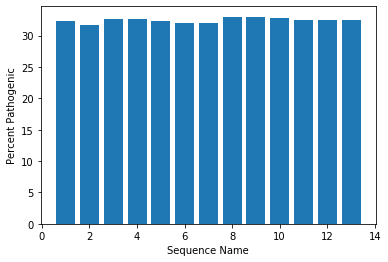

In [20]:
fig, ax = plt.subplots()
ax.bar(np.arange(1, len(percent_pathogenic) + 1), np.fromiter(percent_pathogenic.values(), np.float) * 100)
ax.set_xlabel('Sequence Name')
ax.set_ylabel('Percent Pathogenic')

#### Analyze percentage of pathogenic genes across all groups

In [21]:
vals = np.array(list(percent_pathogenic.values()))
print("Minimum", np.min(vals), "Group:", np.argmin(vals))
print("Maximum", np.max(vals), "Group:", np.argmax(vals))
print("Average", np.average(vals))

Minimum 0.3165156507413509 Group: 1
Maximum 0.3301568393885249 Group: 7
Average 0.3246301530546951


#### Analyze number of occurrences of each sequence across all groups

In [22]:
df.Sequence.count()

65173

In [23]:
num_strains = list(df.groupby('Sequence').count().Organism)
num_strains.sort()
counts = dict(Counter(num_strains))
counts

{1: 3607,
 2: 1288,
 3: 171,
 4: 122,
 5: 202,
 6: 82,
 7: 95,
 8: 141,
 9: 157,
 10: 377,
 11: 676,
 12: 735,
 13: 2551,
 14: 1,
 18: 1,
 19: 2,
 22: 1}

In [24]:
# The most common sequence
df.groupby('Sequence').count()[['Organism']].query('Organism == 22', engine='python')

,Organism
Sequence,
MSKEKFERTKPHVNVGTIGHVDH,22


In [25]:
df.query("Sequence == 'MSKEKFERTKPHVNVGTIGHVDH'")

,Group,Sr._No.,Sequence_Name,Type_of_Pfam_domains,HMM_Prediction,SVM_Score,SVM_prediction,Hybrid_Prediction,Assignment,Sequence,Product,Organism
4700,1,4701,fig|6666666.498498.peg.3059,Uncalssified protein,----------,-2.488133,Non-Pathogenic,Non-Pathogenic,S,MSKEKFERTKPHVNVGTIGHVDH,Translation elongation factor Tu,salmonella sp. Bacteria.
4949,1,4950,fig|6666666.498498.peg.3584,Uncalssified protein,----------,-2.488133,Non-Pathogenic,Non-Pathogenic,S,MSKEKFERTKPHVNVGTIGHVDH,Translation elongation factor Tu,salmonella sp. Bacteria.
9571,3,4503,fig|6666666.498495.peg.2987,Uncalssified protein,----------,-2.488133,Non-Pathogenic,Non-Pathogenic,S,MSKEKFERTKPHVNVGTIGHVDH,Translation elongation factor Tu,salmonella sp. Bacteria.
9840,3,4772,fig|6666666.498495.peg.3557,Uncalssified protein,----------,-2.488133,Non-Pathogenic,Non-Pathogenic,S,MSKEKFERTKPHVNVGTIGHVDH,Translation elongation factor Tu,salmonella sp. Bacteria.
14639,4,4715,fig|6666666.498497.peg.2975,Uncalssified protein,----------,-2.488133,Non-Pathogenic,Non-Pathogenic,S,MSKEKFERTKPHVNVGTIGHVDH,Translation elongation factor Tu,salmonella sp. Bacteria.
14959,4,5035,fig|6666666.498497.peg.3826,Uncalssified protein,----------,-2.488133,Non-Pathogenic,Non-Pathogenic,S,MSKEKFERTKPHVNVGTIGHVDH,Translation elongation factor Tu,salmonella sp. Bacteria.
19774,5,4718,fig|6666666.495479.peg.3073,Uncalssified protein,----------,-2.488133,Non-Pathogenic,Non-Pathogenic,S,MSKEKFERTKPHVNVGTIGHVDH,Translation elongation factor Tu,Salmonella sp. Bacteria.
20052,5,4996,fig|6666666.495479.peg.3651,Uncalssified protein,----------,-2.488133,Non-Pathogenic,Non-Pathogenic,S,MSKEKFERTKPHVNVGTIGHVDH,Translation elongation factor Tu,Salmonella sp. Bacteria.
24836,6,4701,fig|6666666.498498.peg.3059,Uncalssified protein,----------,-2.488133,Non-Pathogenic,Non-Pathogenic,S,MSKEKFERTKPHVNVGTIGHVDH,Translation elongation factor Tu,salmonella sp. Bacteria.
25085,6,4950,fig|6666666.498498.peg.3584,Uncalssified protein,----------,-2.488133,Non-Pathogenic,Non-Pathogenic,S,MSKEKFERTKPHVNVGTIGHVDH,Translation elongation factor Tu,salmonella sp. Bacteria.


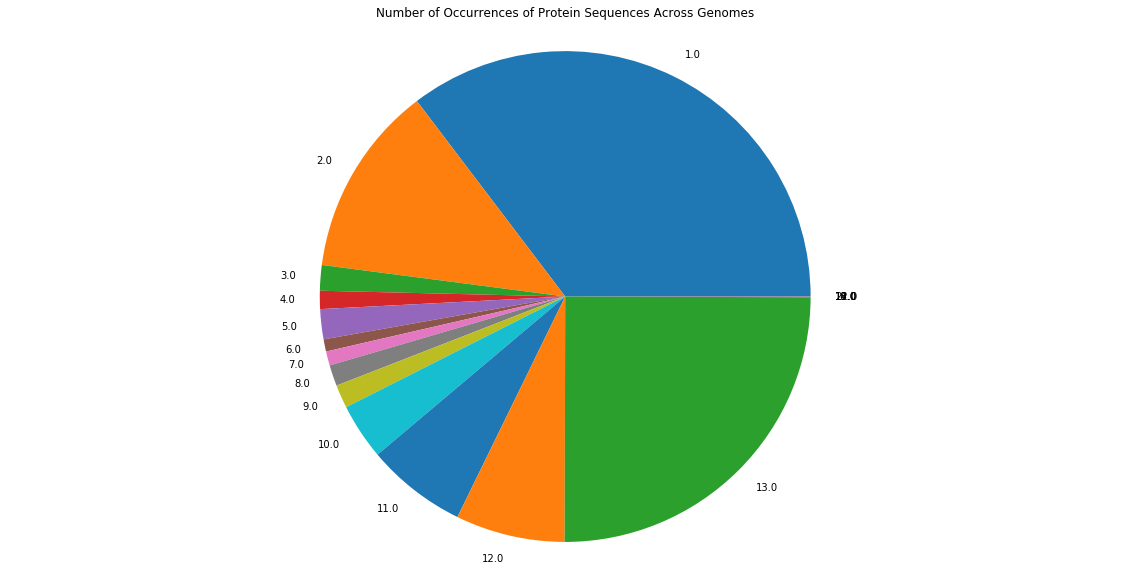

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1)
plt.pie([float(v) for v in counts.values()], labels=[float(k) for k in counts],
           autopct=None)
ax.axis('equal')
plt.title("Number of Occurrences of Protein Sequences Across Genomes")
plt.show()

In [27]:
print("Unique:", 3607 / sum(counts.values()))
print("Shared:", 1 - 3607 / sum(counts.values()))

Unique: 0.3533157018317171
Shared: 0.6466842981682829


--------------------------

#### Analyze number of occurrences of each pathongenic sequence across all groups

In [28]:
pathogenic = df.query("Hybrid_Prediction == 'Pathogenic'", engine='python')
pathogenic.Sequence.count()

21161

In [29]:
num_strains = list(pathogenic.groupby('Sequence').count().Organism)
num_strains.sort()
counts = dict(Counter(num_strains))
counts

{1: 1466,
 2: 484,
 3: 74,
 4: 48,
 5: 78,
 6: 36,
 7: 38,
 8: 65,
 9: 84,
 10: 158,
 11: 224,
 12: 242,
 13: 709}

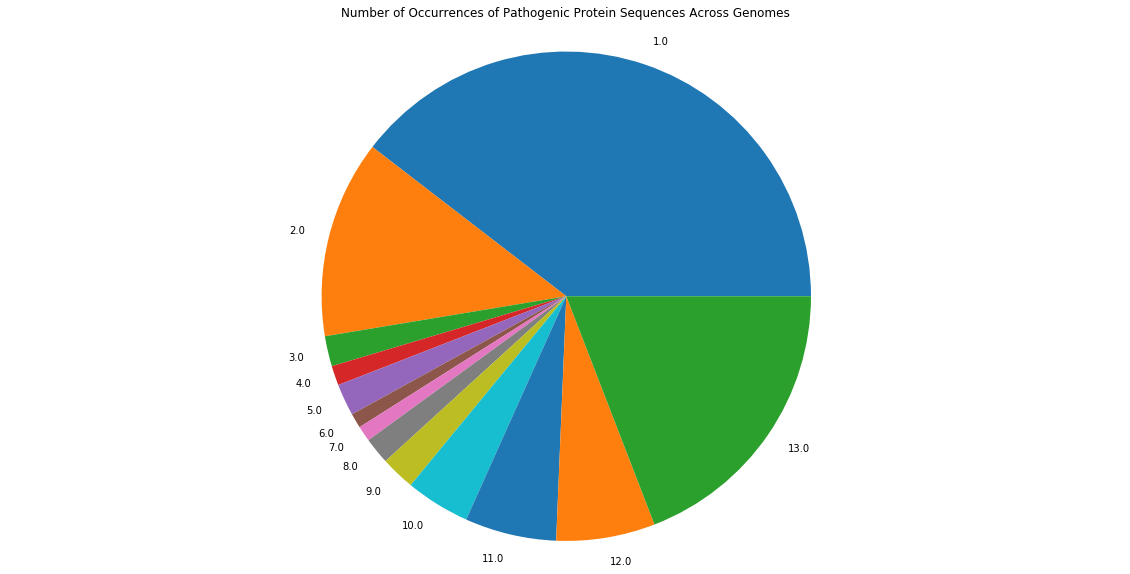

In [30]:
fig, ax = plt.subplots(figsize=(20, 10))
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1)
plt.pie([float(v) for v in counts.values()], labels=[float(k) for k in counts],
           autopct=None)
ax.axis('equal')
plt.title("Number of Occurrences of Pathogenic Protein Sequences Across Genomes")
plt.show()

In [31]:
print("Unique:", 1466 / sum(counts.values()))
print("Shared:", 1 - 1466 / sum(counts.values()))
print("13 Occurrences:", 709 / sum(counts.values()))

Unique: 0.39557474365893147
Shared: 0.6044252563410686
13 Occurrences: 0.19131138694009714


## Presentations
Prepare a ten minute PowerPoint presentation describing all of the results of your genome assembly and analysis. Everyone in your group should speak during the presentation. You will have 5 minutes for questions at the end.  Summarize the results of your assembly (e.g., N50, contig length histogram).  

Summarize the results of your annotations.  
Which analysis project did you choose?  
What were some of the issues you ran into?  
What were your results?  
If you had more time, what additional experiments and analyses would you perform?

https://docs.google.com/presentation/d/1RbJZauYtNAMGt-8NderWXZFYrPkHX5TcpzVry1Rf-8M/edit#slide=id.g78e2f7005c_0_139

--------------------------

## Written report
Submit a report (up to 5 pages, not included figures) along with your final presentation. This report should summarize your assembly results, your annotations, the methods that you used for your original analysis, and the findings of your analysis. Please be clear about the question you are trying to answer, how your chosen method will help you answer it, and any potential limitations of your results

https://docs.google.com/document/d/14i9ybUDlcupi-CD59QiB8MZmO2S0zLC6iamq70-43xA/edit?usp=sharing

--------------------------